<a href="https://colab.research.google.com/github/JffrGD2/validacion_de_firmas/blob/main/modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow opencv-python numpy matplotlib scikit-learn seaborn scikit-image flask keras fastapi uvicorn sqlalchemy


import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from skimage import io, color, filters, feature

In [ ]:
import sqlite3
import numpy as np
from sklearn.model_selection import train_test_split

conn = sqlite3.connect('/content/BDFirmas.db')
cursor = conn.cursor()
print("Conexión exitosa a la base de datos")


cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()
print("tablas =", [tabla[0] for tabla in tablas])


conn.close()

Conexión exitosa a la base de datos
tablas = ['sqlite_sequence', 'firma', 'documento', 'usuario', 'firmas_usuarios', 'comparacion_firmas', 'registro_fraudes', 'tipos_documentos', 'parametros_sistema', 'historial_firmas', 'logs_actividad', 'dispositivos_registrados', 'intentos_firma']
Conexión cerrada


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/Colab Notebooks/processed_images_train"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sección nueva

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np

train = '/content/drive/MyDrive/Colab Notebooks/Processed_Images_Train'
test = '/content/drive/MyDrive/Colab Notebooks/Processed_Images_Test'

def preprocesar_imagenes(directorio, tamaño=(128, 128)):
    imagenes_procesadas = []
    etiquetas = []

    if not os.path.exists(directorio):
        print(f"Error: El directorio '{directorio}' no existe.")
        return np.array([]), np.array([])

    for etiqueta in os.listdir(directorio):
        carpeta = os.path.join(directorio, etiqueta)

        if not os.path.isdir(carpeta):
            continue

        for nombre_imagen in os.listdir(carpeta):
            ruta_imagen = os.path.join(carpeta, nombre_imagen)

            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
            if imagen is None:
                print(f"Advertencia: No se pudo cargar '{ruta_imagen}', se omitirá.")
                continue


            imagen = cv2.resize(imagen, tamaño)
            imagen = imagen.astype(np.float32) / 255.0

            # datos
            imagenes_procesadas.append(imagen)
            etiquetas.append(etiqueta)

    if not imagenes_procesadas:
        print("Error: No se encontraron imágenes válidas.")
        return np.array([]), np.array([])

    return np.array(imagenes_procesadas), np.array(etiquetas)

# Preprocesar las imágenes de entrenamiento y prueba
imagenes_train, etiquetas_train = preprocesar_imagenes(train)
imagenes_test, etiquetas_test = preprocesar_imagenes(test)

print(f"Total imágenes de entrenamiento: {len(imagenes_train)}")
print(f"Total imágenes de prueba: {len(imagenes_test)}")

if imagenes_train.size > 0:
    print(f"Dimensión de entrenamiento: {imagenes_train[0].shape}")
if imagenes_test.size > 0:
    print(f"Dimensión de prueba: {imagenes_test[0].shape}")


Total imágenes de entrenamiento: 186
Total imágenes de prueba: 184
Dimensión de entrenamiento: (128, 128)
Dimensión de prueba: (128, 128)


In [ ]:
# confirmamos el tamaño de las imagenes que estén del mismo tamaño
if imagenes_train.size > 0:
    print(f"Dimensión de entrenamiento: {imagenes_train[0].shape}")
if imagenes_test.size > 0:
    print(f"Dimensión de prueba: {imagenes_test[0].shape}")


Dimensión de entrenamiento: (128, 128)
Dimensión de prueba: (128, 128)


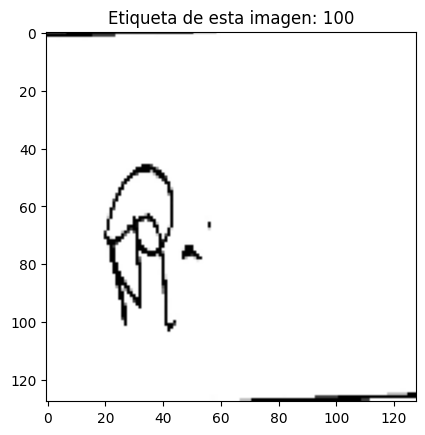

In [ ]:
import matplotlib.pyplot as plt # immportamos esto para mostrar graficas

img = imagenes_train[13]
plt.imshow(img, cmap='gray')
plt.title("Etiqueta de esta imagen: " + str(etiquetas_train[0]))  # para blanco y negr0
plt.show()  # a ver qué sale ☠

In [ ]:
resultado = "Este es el resultado de la ejecución del modelo"
print(resultado)